In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
diamantes = pd.read_csv('./data.csv')

In [3]:
diamantes.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,8.36,5.20,12831
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,8.50,5.39,16170
2,0.80,Premium,F,SI2,61.0,57.0,6.03,6.01,3.67,2797
3,0.40,Ideal,F,I1,63.3,60.0,4.68,4.64,2.95,630
4,0.31,Ideal,G,VS2,61.6,55.0,4.39,4.37,2.70,698


(array([1.4656e+04, 2.5795e+04, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.  ,  3.18,  6.36,  9.54, 12.72, 15.9 , 19.08, 22.26, 25.44,
        28.62, 31.8 ]),
 <a list of 10 Patch objects>)

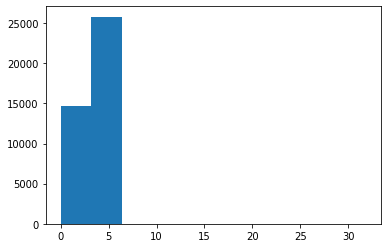

In [4]:
plt.hist(diamantes['z'])

color
D    3171.102854
E    3045.476644
F    3722.869135
G    4031.810528
H    4515.971108
I    5093.184132
J    5331.782979
Name: price, dtype: float64


(array([2., 0., 1., 0., 1., 0., 1., 0., 1., 1.]),
 array([3045.47664442, 3274.10727785, 3502.73791128, 3731.36854471,
        3959.99917814, 4188.62981157, 4417.260445  , 4645.89107843,
        4874.52171186, 5103.15234529, 5331.78297872]),
 <a list of 10 Patch objects>)

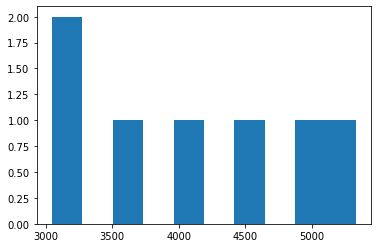

In [5]:
color = diamantes.groupby('color')['price'].mean()
print(color)
plt.hist(color)

In [6]:
D = 3171.102854
E = 3045.476644
F = 3722.869135
G = 4031.810528
H = 4515.971108
I = 5093.184132
J = 5331.782979
lista = [D,E,F,G,G,I,J]
Min = E
Max = J
constante = Max - Min
print(constante)
for ele in lista:
    valores_normalizados = []
    valores_normalizados.append((ele-Min)/constante)
print(valores_normalizados)

2286.3063349999998
[1.0]


In [7]:

D_nor = (D-Min)/constante
E_nor = (E-Min)/constante
F_nor = (F-Min)/constante
G_nor = (G-Min)/constante
H_nor = (H-Min)/constante
I_nor = (I-Min)/constante
J_nor = (J-Min)/constante

def color (e):
    if e=="D":
        return D_nor
    elif e=="E":
        return E_nor
    elif e=="F":
        return F_nor
    elif e=="G":
        return G_nor
    elif e=="H":
        return H_nor
    elif e=="I":
        return I_nor
    elif e=="J":
        return J_nor
    else:
        pass
    return e

cut
Fair         4314.240741
Good         3939.188219
Ideal        3471.373133
Premium      4591.921268
Very Good    3975.810900
Name: price, dtype: float64


(array([1., 0., 0., 0., 2., 0., 0., 1., 0., 1.]),
 array([3471.3731334 , 3583.42794688, 3695.48276036, 3807.53757384,
        3919.59238732, 4031.6472008 , 4143.70201427, 4255.75682775,
        4367.81164123, 4479.86645471, 4591.92126819]),
 <a list of 10 Patch objects>)

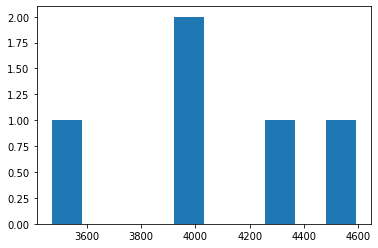

In [8]:
cut = diamantes.groupby('cut')['price'].mean()
print(cut)
plt.hist(cut)

In [9]:
Fair = 4314.240741
Good = 3939.188219
Ideal = 3471.373133
Premium = 4591.921268
Very_Good = 3975.810900
Min_c = Ideal
Max_c = Premium
constante_c = Max_c - Min_c

Fair_nor = (Fair-Min_c)/constante_c
Good_nor = (Good-Min_c)/constante_c
Ideal_nor = (Ideal-Min_c)/constante_c
Premium_nor = (Premium-Min_c)/constante_c
Very_Good_nor = (Very_Good-Min_c)/constante_c

def talla (e):
    if e=="Ideal":
        return Ideal_nor
    elif e=="Premium":
        return Premium_nor
    elif e=="Very Good":
        return Very_Good_nor
    elif e=="Good":
        return Good_nor
    elif e=="Fair":
        return Fair_nor
    else:
        pass
    return e

clarity
I1      3839.719928
IF      2896.477876
SI1     4004.427050
SI2     5085.107541
VS1     3828.779763
VS2     3927.140046
VVS1    2548.111679
VVS2    3289.979069
Name: price, dtype: float64


(array([1., 1., 1., 0., 0., 4., 0., 0., 0., 1.]),
 array([2548.11167883, 2801.81126504, 3055.51085124, 3309.21043745,
        3562.91002365, 3816.60960986, 4070.30919607, 4324.00878227,
        4577.70836848, 4831.40795468, 5085.10754089]),
 <a list of 10 Patch objects>)

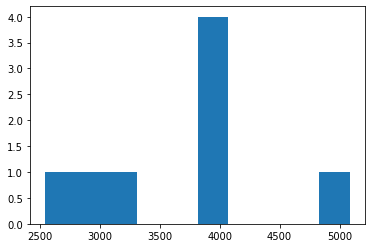

In [12]:
clarity = diamantes.groupby('clarity')['price'].mean()
print(clarity)
plt.hist(clarity)

In [13]:
I1  = 3839.719928
IF  = 2896.477876
SI1 = 4004.427050
SI2 = 5085.107541
VS1  = 3828.779763
VS2 = 3927.140046
VVS1 = 2548.111679
VVS2 = 3289.979069

Min_cla = IF
Max_cla = SI2
constante_cla = Max_cla - Min_cla

I1_nor = (I1-Min_cla)/constante_cla
IF_nor = (IF-Min_cla)/constante_cla
SI1_nor = (SI1-Min_cla)/constante_cla
SI2_nor = (SI2-Min_cla)/constante_cla
VS1_nor = (VS1-Min_cla)/constante_cla
VS2_nor = (VS2-Min_cla)/constante_cla
VVS1_nor = (VVS1-Min_cla)/constante_cla
VVS2_nor = (VVS2-Min_cla)/constante_cla

def claridad (e):
    if e=="IF":
        return IF_nor
    elif e=="VVS1":
        return VVS1_nor
    elif e=="VVS2":
        return VVS2_nor
    elif e=="VS1":
        return VS1_nor
    elif e=="VS2":
        return VS2_nor
    elif e=="SI1":
        return SI1_nor
    elif e=="SI2":
        return SI2_nor
    elif e=="I1":
        return I1_nor
    else:
        pass
    return e



In [14]:
modelo_diamantes_1 = diamantes


modelo_diamantes_1['cut'] = modelo_diamantes_1.cut.apply(talla)
modelo_diamantes_1['color'] = modelo_diamantes_1.color.apply(color)
modelo_diamantes_1['clarity'] = modelo_diamantes_1.clarity.apply(claridad)

modelo_diamantes_2 = modelo_diamantes_1
modelo_diamantes_2.drop('depth',axis=1)

modelo_diamantes_3 = diamantes

In [15]:
modelo_diamantes_3.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.26,0.000000,0.431409,1.000000,61.9,57.0,8.44,8.36,5.20,12831
1,2.43,0.450171,0.643175,1.000000,63.2,57.0,8.56,8.50,5.39,16170
2,0.80,1.000000,0.296282,1.000000,61.0,57.0,6.03,6.01,3.67,2797
3,0.40,0.000000,0.296282,0.430974,63.3,60.0,4.68,4.64,2.95,630
4,0.31,0.000000,0.431409,0.470917,61.6,55.0,4.39,4.37,2.70,698


In [18]:
train_data,fitted_lambda = stats.boxcox(train)

0        8.44
1        8.56
2        6.03
3        4.68
4        4.39
         ... 
40450    6.63
40451    5.77
40452    7.09
40453    5.76
40454    5.27
Name: x, Length: 40455, dtype: float64

In [ ]:
modelo_diamantes_1["carat"].apply(np.log).hist()
plt.show()

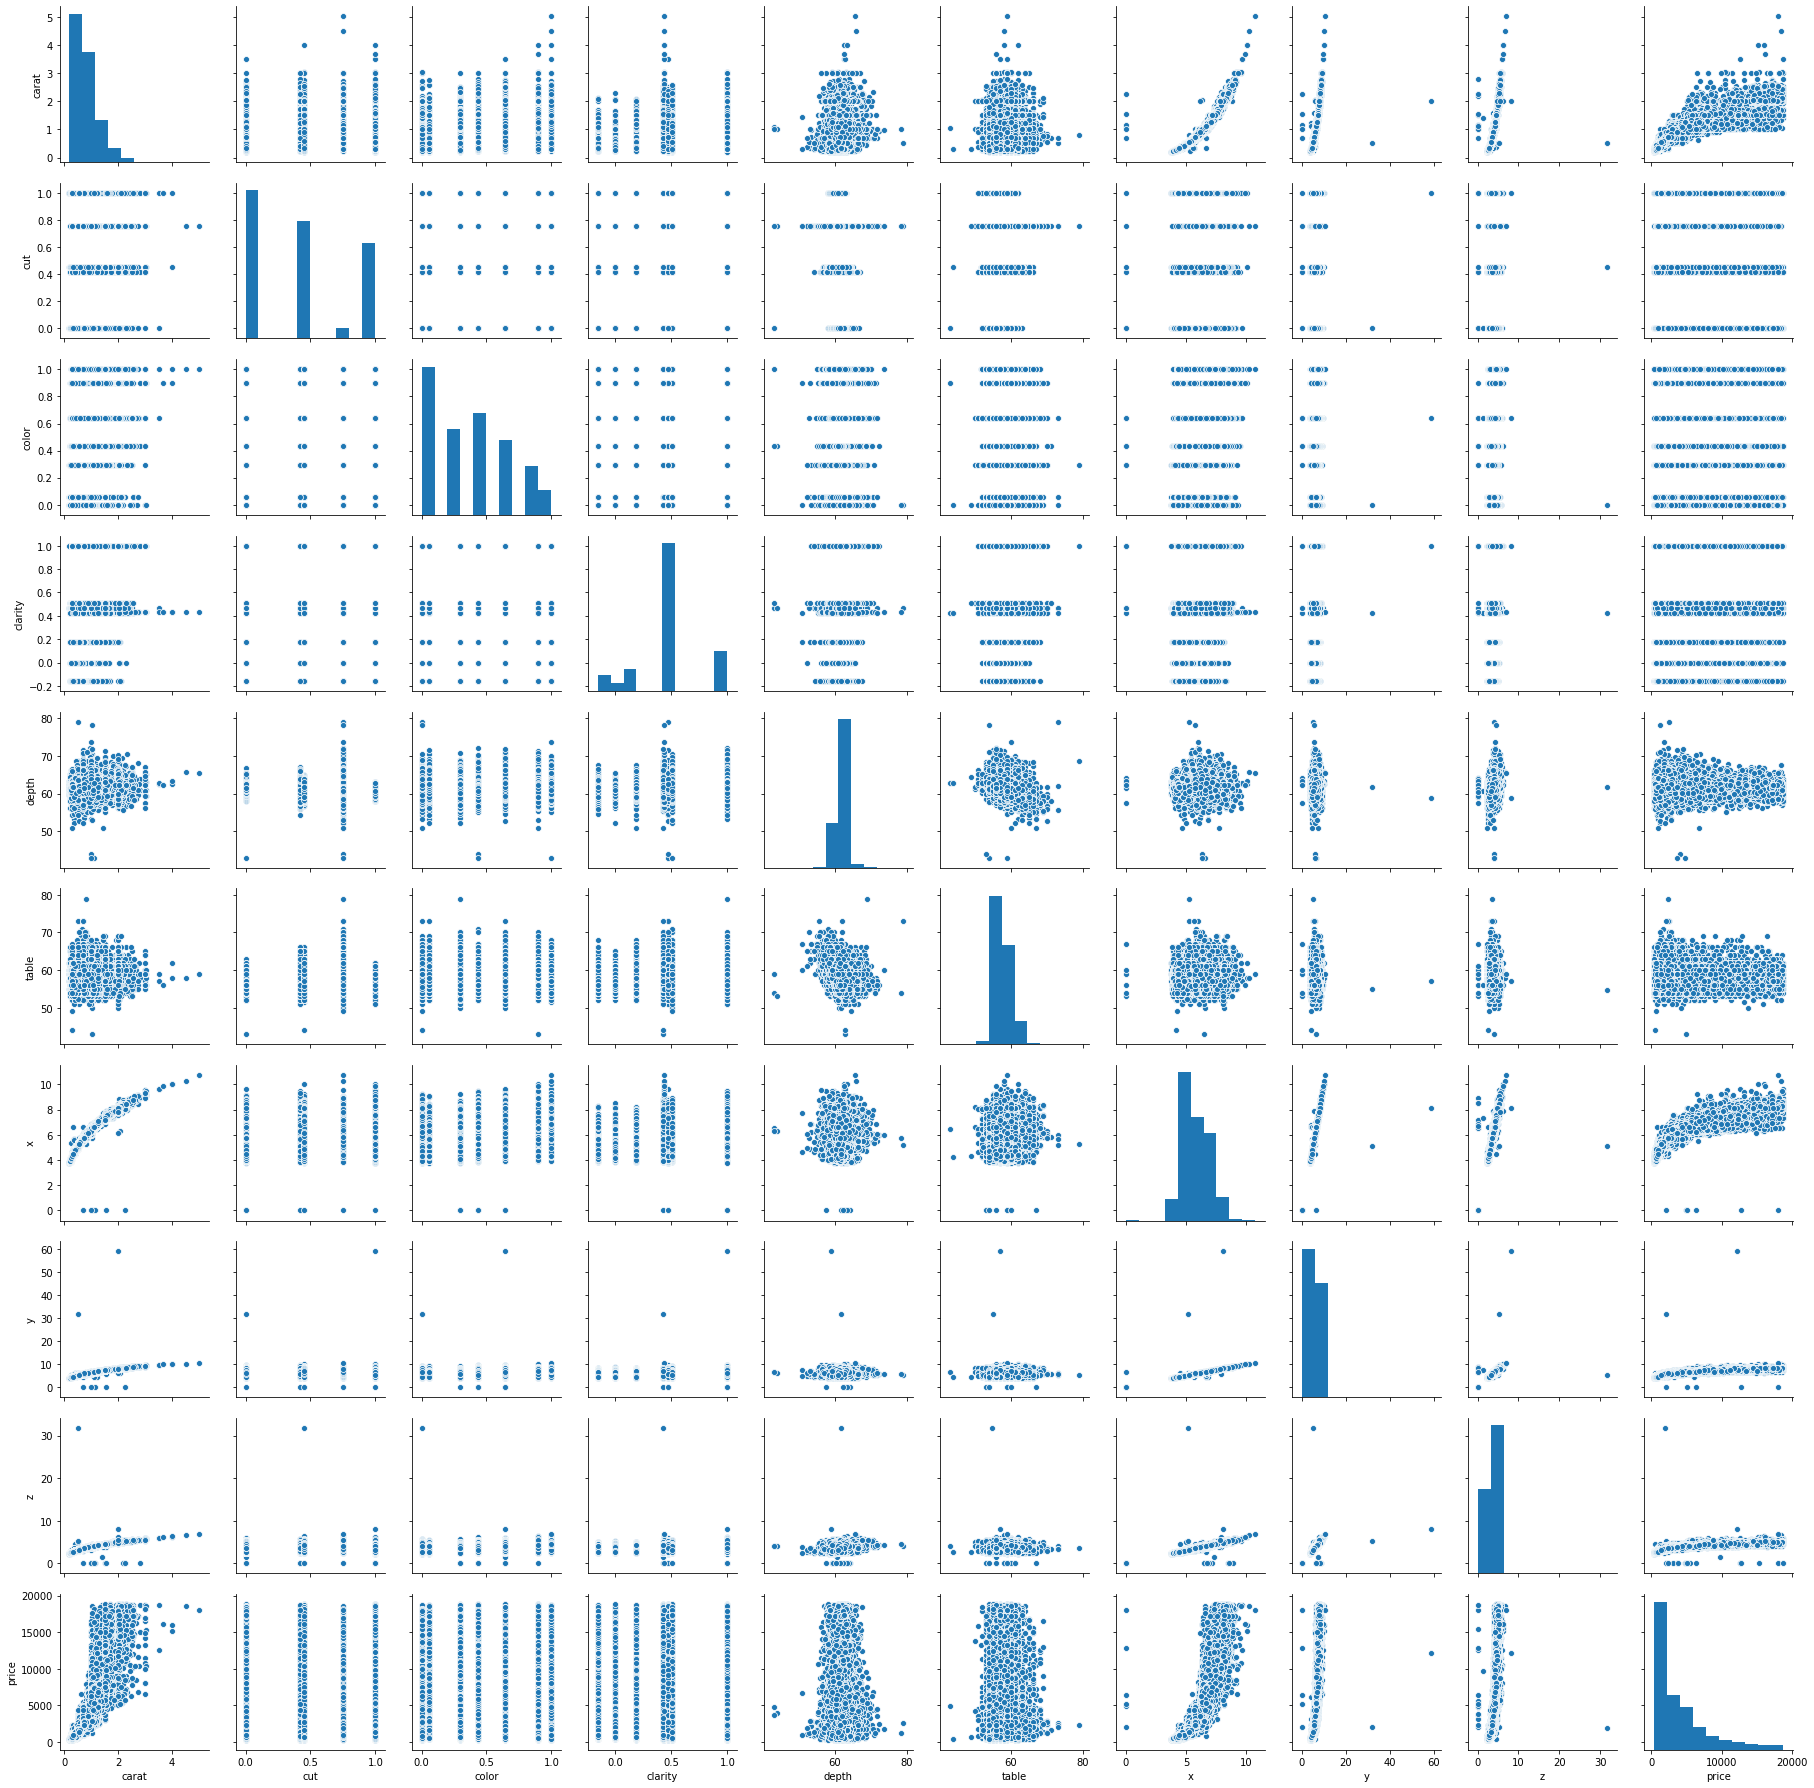

In [19]:
sns.pairplot(modelo_diamantes_2)

In [ ]:
y = modelo_diamantes_1['price']
x= modelo_diamantes_1['x']
def cost_function(e):
    #y and x are already defined
    r = np.corrcoef(y,x**e) #returns correlation matrix
    #print each iteration
    print('r value: {:0.4f} exp: {:.4f}'.format(r[0][1],e)) 
    return -abs(r[0][1])

In [ ]:
from scipy.optimize import minimize_scalar 
minimize_scalar(cost_function)

In [ ]:
from scipy.optimize import curve_fit
def fit_func(t,b):
    return b*np.expo(-b*t)



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(modelo_diamantes_2.drop(['price'],axis=1), modelo_diamantes_2.price , test_size = 0.2)
print("Valor de X_train {}.".format(X_train.shape))
print("Valor de X_test {}.".format(X_test.shape))
print("Valor de  y_train {}.".format(y_train.shape))
print("Valor de  y_train {}.".format(y_test.shape))

In [ ]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)

In [ ]:


predictions = rf.predict(X_test) #Hago las predicciones para evaluar la eficacia del modelo.
errors = abs(predictions - y_test)
print('Error absoluto medio:', round(np.mean(errors), 2), 'grados.')



In [ ]:


mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
import math
math.sqrt(mean_squared_error(y_test, predictions))

In [ ]:
test=pd.read_csv("./test.csv")
test["color"]=test["color"].apply(color)
test["cut"]=test["cut"].apply(talla)
test["clarity"]=test["clarity"].apply(claridad)

In [ ]:
prediccion = rf.predict(test.drop(["id"],axis=1))

In [ ]:
test_id=test["id"]
predic=pd.DataFrame(prediccion)
resultado=pd.concat([test_id,predic],axis=1)
resultado.rename(columns={'id': 'id', 0: 'price'}, inplace=True)


In [ ]:
resultado.to_csv(r"resultado_1.csv",index=False)